In [1]:
# Importando bibliotecas iniciais
import os
import openai
from dotenv import load_dotenv

load_dotenv()

openai_api_key = os.getenv("OPENAI_API_KEY")

# LangChain: RAG (Retriever-Augmented Generation)

O que seria RAG?

- RAG (Retrieval-Augmented Generation - Geração baseada em recuperação aumentada) é uma técnica utilizada para melhorar as respostas de modelos de LLMs, integrando recuperação de informação. Ao invés de depender apenas do conhecimento limitado do modelo, o RAG permite que o modelo busque informações de diferentes bases de dados (como por exemplo, suas bases de dados).

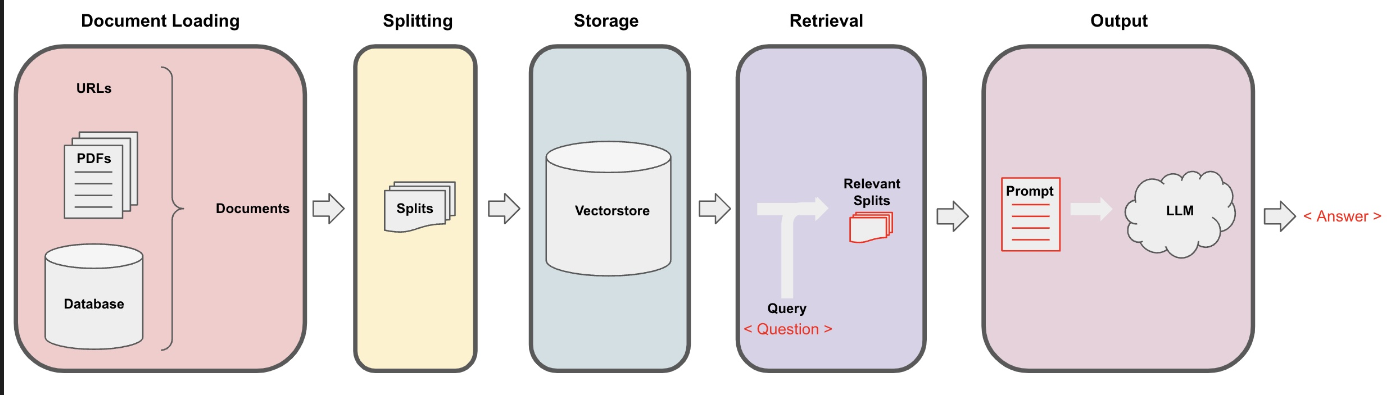
(Imagem retirada do curso da DeepLearning AI: https://learn.deeplearning.ai/courses/langchain-chat-with-your-data/lesson/2/document-loading)

# Loader de PDF

In [2]:
!pip install pypdf

In [3]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("Currículo para vaga de Analista ou Cientista de Dados.pdf")
pages = loader.load()

Cada página do PDF é um `Document`

Um `Documento` contem texto(`page_content`) e `metadata`

por exemplo:

In [4]:
pages

[Document(metadata={'source': 'Currículo para vaga de Analista ou Cientista de Dados.pdf', 'page': 0}, page_content='Diogo Dias\nEnsino\nUniversidade Federal da Paraíba , Bacharelado em Engenharia Química Agosto 2022 – Dezembro\n2026\n•Competências: Análise de Dados, Programação, Inteligência Artificial, Álgebra Linear, Estatística, Cálculo\nNumérico, Séries Temporais, Introdução a Ciência de Dados.\nUniversidade Cruzeiro do Sul Virtual , Tecnólogo em Ciência de Dados Agosto 2024 – Agosto 2026\n•Competências: Modelagem de Dados, Programação, Inteligência Artificial, Inferência Estatística, Probabilidade\ne Estatística, Machine Learning, Deep Learning.\nExperiências\nIniciação Científica , Universidade Federal da Paraíba Dezembro de 2023 – Até o\nMomento\n•Pesquisa de Algoritmos de Machine Learning para otimização do processo experimental em pirólise.\n•Pirólise de biomassas com a perspectiva de produzir biocombustíveis com baixa pegada de carbono.\n•Análise de dados experimentais.\nExp

In [5]:
# Número de páginas
len(pages)

1

In [6]:
# Se o doc tem várias páginas, é possível selecionar alguma em específico
page = pages[0]
page

Document(metadata={'source': 'Currículo para vaga de Analista ou Cientista de Dados.pdf', 'page': 0}, page_content='Diogo Dias\nEnsino\nUniversidade Federal da Paraíba , Bacharelado em Engenharia Química Agosto 2022 – Dezembro\n2026\n•Competências: Análise de Dados, Programação, Inteligência Artificial, Álgebra Linear, Estatística, Cálculo\nNumérico, Séries Temporais, Introdução a Ciência de Dados.\nUniversidade Cruzeiro do Sul Virtual , Tecnólogo em Ciência de Dados Agosto 2024 – Agosto 2026\n•Competências: Modelagem de Dados, Programação, Inteligência Artificial, Inferência Estatística, Probabilidade\ne Estatística, Machine Learning, Deep Learning.\nExperiências\nIniciação Científica , Universidade Federal da Paraíba Dezembro de 2023 – Até o\nMomento\n•Pesquisa de Algoritmos de Machine Learning para otimização do processo experimental em pirólise.\n•Pirólise de biomassas com a perspectiva de produzir biocombustíveis com baixa pegada de carbono.\n•Análise de dados experimentais.\nExpe

Aqui no caso, estou consultando da página selecionada lá em cima, o conteúdo do primeiro caractere até o 500. 

In [7]:
print(page.page_content[0:500])

Diogo Dias
Ensino
Universidade Federal da Paraíba , Bacharelado em Engenharia Química Agosto 2022 – Dezembro
2026
•Competências: Análise de Dados, Programação, Inteligência Artificial, Álgebra Linear, Estatística, Cálculo
Numérico, Séries Temporais, Introdução a Ciência de Dados.
Universidade Cruzeiro do Sul Virtual , Tecnólogo em Ciência de Dados Agosto 2024 – Agosto 2026
•Competências: Modelagem de Dados, Programação, Inteligência Artificial, Inferência Estatística, Probabilidade
e Estatística


Aqui estou observando todo o conteúdo da página

In [8]:
print(page.page_content)

Diogo Dias
Ensino
Universidade Federal da Paraíba , Bacharelado em Engenharia Química Agosto 2022 – Dezembro
2026
•Competências: Análise de Dados, Programação, Inteligência Artificial, Álgebra Linear, Estatística, Cálculo
Numérico, Séries Temporais, Introdução a Ciência de Dados.
Universidade Cruzeiro do Sul Virtual , Tecnólogo em Ciência de Dados Agosto 2024 – Agosto 2026
•Competências: Modelagem de Dados, Programação, Inteligência Artificial, Inferência Estatística, Probabilidade
e Estatística, Machine Learning, Deep Learning.
Experiências
Iniciação Científica , Universidade Federal da Paraíba Dezembro de 2023 – Até o
Momento
•Pesquisa de Algoritmos de Machine Learning para otimização do processo experimental em pirólise.
•Pirólise de biomassas com a perspectiva de produzir biocombustíveis com baixa pegada de carbono.
•Análise de dados experimentais.
Experiências Adicionais
Comunicador: Tenho dois projetos que visam compartilhar conhecimento de programação e ciência de dados de
forma

Aqui estou consultando o título do arquivo e a quantidade de página.
Ou seja, todo o metadata.

In [9]:
page.metadata

{'source': 'Currículo para vaga de Analista ou Cientista de Dados.pdf',
 'page': 0}

# Loader do Youtube

In [10]:
from langchain.document_loaders.generic import GenericLoader
from langchain.document_loaders.parsers import OpenAIWhisperParser
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

In [11]:
! pip install yt_dlp
! pip install pydub
! pip install ffmpeg
! pip install ffprobe

In [12]:
url = "https://www.youtube.com/watch?v=yoHS2T32Z5o&pp=ygUNaG9sZCBvbiBhZGVsZQ%3D%3D"
save_dir = "docs/youtube/"
loader =  GenericLoader(
    YoutubeAudioLoader([url], save_dir),
    OpenAIWhisperParser()
)
docs = loader.load()

[youtube] Extracting URL: https://www.youtube.com/watch?v=yoHS2T32Z5o&pp=ygUNaG9sZCBvbiBhZGVsZQ%3D%3D
[youtube] yoHS2T32Z5o: Downloading webpage
[youtube] yoHS2T32Z5o: Downloading ios player API JSON
[youtube] yoHS2T32Z5o: Downloading web creator player API JSON
[youtube] yoHS2T32Z5o: Downloading player e38bb6de
[youtube] yoHS2T32Z5o: Downloading m3u8 information
[info] yoHS2T32Z5o: Downloading 1 format(s): 140
[download] docs\youtube\Adele - Hold On (Official Lyric Video).m4a has already been downloaded
[download] 100% of    5.66MiB
[ExtractAudio] Not converting audio docs\youtube\Adele - Hold On (Official Lyric Video).m4a; file is already in target format m4a
Transcribing part 1!


In [13]:
docs

[Document(metadata={'source': 'docs\\youtube\\Adele - Hold On (Official Lyric Video).m4a', 'chunk': 0}, page_content="Oh, you are still strong Love will soon come Just hold on Oh, what have I done yet again? Have I not learned anything? I don't want to live in chaos It's like a ride that I want to get off It's hard to hold on to who I am When I'm stumbling in the dark for a hand I am so tired of battling With myself and no chance to win Oh, let time be patient Let pain be gracious Just hold on I swear to God I am such a mess The harder that I try, I regress I'm my own worst enemy Right now I truly hate being me Every day feels like the road I'm on Might just open up and swallow me whole How do I feel so mighty small When I'm struggling to feel at all? Just hold on Let time be patient You are still strong Let pain be gracious Just hold on Sometimes loneliness is the only rest we get And the emptiness actually lets us forget Sometimes forgiveness is easiest in secret So just hold on Let 

In [14]:
docs[0].page_content

"Oh, you are still strong Love will soon come Just hold on Oh, what have I done yet again? Have I not learned anything? I don't want to live in chaos It's like a ride that I want to get off It's hard to hold on to who I am When I'm stumbling in the dark for a hand I am so tired of battling With myself and no chance to win Oh, let time be patient Let pain be gracious Just hold on I swear to God I am such a mess The harder that I try, I regress I'm my own worst enemy Right now I truly hate being me Every day feels like the road I'm on Might just open up and swallow me whole How do I feel so mighty small When I'm struggling to feel at all? Just hold on Let time be patient You are still strong Let pain be gracious Just hold on Sometimes loneliness is the only rest we get And the emptiness actually lets us forget Sometimes forgiveness is easiest in secret So just hold on Let time be patient You are still strong Let pain be gracious Listen girl, baby If you just hold on Hold on, hold on, hol

# URLs

In [15]:
from langchain.document_loaders import WebBaseLoader

# Essa é a url do livro Python Fluente
loader = WebBaseLoader("https://pythonfluente.com/")
docs = loader.load()

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [16]:
print(docs[0].page_content[0:500])









Python Fluente, Segunda Edição (2023)





Python Fluente, Segunda Edição (2023)

Luciano Ramalho


Sumário

Prefácio

Para quem é esse livro
Para quem esse livro não é
Como ler este livro
Abordagem "mão na massa"
Ponto de vista: minha perspectiva pessoal
Conteúdo na na Web
Convenções usadas no livro
Usando os exemplos de código
O’Reilly Online Learning
Como entrar em contato
Agradecimentos
Sobre esta tradução
Histórico das traduções


Parte I: Estruturas de dados

1. O modelo de dados d


No curso também leram um DB do Notion (mas eu não vou fzr aqui por motivo de: ganhar tempo)

# Spliter

Tipos de Splitters do LangChain:

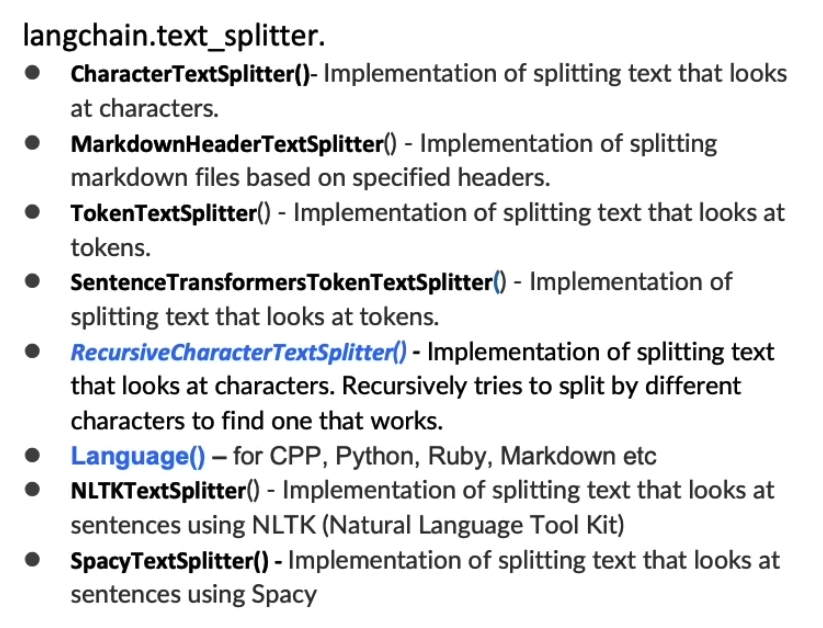

In [17]:
from langchain_text_splitters import RecursiveCharacterTextSplitter, CharacterTextSplitter

In [18]:
chunk_size = 26
chunk_overlap = 4

In [19]:
recursive_splitter = RecursiveCharacterTextSplitter(
    chunk_size = chunk_size,
    chunk_overlap = chunk_overlap
)

character_splitter = CharacterTextSplitter(
    chunk_size = chunk_size,
    chunk_overlap= chunk_overlap
)

In [20]:
text1 = "Quando o relógio bate às 10, todas as caveiras comem pastéis! Tumbalacatumba tumbabá!"
text2 = """Everybody tells me it's 'bout time that I moved on
And I need to learn to lighten up and learn how to be young
But my heart is a valley, it's so shallow and man made
I'm scared to death if I let you in that you'll see I'm just a fake"""

In [21]:
recursive_splitter.split_text(text1)

['Quando o relógio bate às',
 'às 10, todas as caveiras',
 'comem pastéis!',
 'Tumbalacatumba tumbabá!']

In [22]:
recursive_splitter.split_text(text2)

["Everybody tells me it's",
 "'bout time that I moved",
 'on',
 'And I need to learn to',
 'to lighten up and learn',
 'how to be young',
 'But my heart is a valley,',
 "it's so shallow and man",
 'man made',
 "I'm scared to death if I",
 "I let you in that you'll",
 "see I'm just a fake"]

In [23]:
character_splitter.split_text(text2)

["Everybody tells me it's 'bout time that I moved on\nAnd I need to learn to lighten up and learn how to be young\nBut my heart is a valley, it's so shallow and man made\nI'm scared to death if I let you in that you'll see I'm just a fake"]

In [24]:
character_splitter.split_text(text1)

['Quando o relógio bate às 10, todas as caveiras comem pastéis! Tumbalacatumba tumbabá!']

In [25]:
character_splitter = CharacterTextSplitter(
    chunk_size = chunk_size,
    chunk_overlap= chunk_overlap,
    separator= ' '
)

In [26]:
character_splitter.split_text(text1)

['Quando o relógio bate às',
 'às 10, todas as caveiras',
 'comem pastéis!',
 'Tumbalacatumba tumbabá!']

In [27]:
character_splitter.split_text(text2)

["Everybody tells me it's",
 "it's 'bout time that I",
 'I moved on\nAnd I need to',
 'to learn to lighten up and',
 'and learn how to be',
 'be young\nBut my heart is a',
 "is a valley, it's so",
 'so shallow and man',
 "man made\nI'm scared to",
 'to death if I let you in',
 "in that you'll see I'm",
 "I'm just a fake"]

In [28]:
textinho = """Enquanto caminhava pelas ruas da cidade, Clara notava como o ambiente parecia ter ganhado uma nova vida com a chegada da primavera. \
As árvores, antes secas e desfolhadas, agora floresciam com cores vibrantes, e o cheiro suave das flores misturava-se com a brisa fresca do fim da tarde. \n\n 
Ao longe, o som de risadas e conversas animadas preenchia o ar, enquanto pessoas se reuniam em cafés e praças. \
Para Clara, aquela era a estação dos recomeços, uma época em que tudo parecia possível, e o mundo ao seu redor parecia conspirar para oferecer novas oportunidades."""

In [29]:
len(textinho)

564

In [30]:
character_splitter = CharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0,
    separator = ' '
)
recursive_splitter = RecursiveCharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0, 
    separators=["\n\n", "\n", " ", ""]
)

In [31]:
character_splitter.split_text(textinho)

['Enquanto caminhava pelas ruas da cidade, Clara notava como o ambiente parecia ter ganhado uma nova vida com a chegada da primavera. As árvores, antes secas e desfolhadas, agora floresciam com cores vibrantes, e o cheiro suave das flores misturava-se com a brisa fresca do fim da tarde. \n\n \nAo longe, o som de risadas e conversas animadas preenchia o ar, enquanto pessoas se reuniam em cafés e praças. Para Clara, aquela era a estação dos recomeços,',
 'uma época em que tudo parecia possível, e o mundo ao seu redor parecia conspirar para oferecer novas oportunidades.']

In [32]:
recursive_splitter.split_text(textinho)

['Enquanto caminhava pelas ruas da cidade, Clara notava como o ambiente parecia ter ganhado uma nova vida com a chegada da primavera. As árvores, antes secas e desfolhadas, agora floresciam com cores vibrantes, e o cheiro suave das flores misturava-se com a brisa fresca do fim da tarde.',
 'Ao longe, o som de risadas e conversas animadas preenchia o ar, enquanto pessoas se reuniam em cafés e praças. Para Clara, aquela era a estação dos recomeços, uma época em que tudo parecia possível, e o mundo ao seu redor parecia conspirar para oferecer novas oportunidades.']

Diminuinto o chunck para notar algum comportamento.

In [33]:
character_splitter = CharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=0,
    separator = ' '
)
recursive_splitter = RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=0, 
    separators=["\n\n", "\n", " ", ""]
)

In [34]:
character_splitter.split_text(textinho)

['Enquanto caminhava pelas ruas da cidade, Clara notava como o ambiente parecia ter ganhado uma nova',
 'vida com a chegada da primavera. As árvores, antes secas e desfolhadas, agora floresciam com cores',
 'vibrantes, e o cheiro suave das flores misturava-se com a brisa fresca do fim da tarde. \n\n \nAo',
 'longe, o som de risadas e conversas animadas preenchia o ar, enquanto pessoas se reuniam em cafés e',
 'praças. Para Clara, aquela era a estação dos recomeços, uma época em que tudo parecia possível, e o',
 'mundo ao seu redor parecia conspirar para oferecer novas oportunidades.']

In [35]:
recursive_splitter.split_text(textinho)

['Enquanto caminhava pelas ruas da cidade, Clara notava como o ambiente parecia ter ganhado uma nova',
 'vida com a chegada da primavera. As árvores, antes secas e desfolhadas, agora floresciam com cores',
 'vibrantes, e o cheiro suave das flores misturava-se com a brisa fresca do fim da tarde.',
 'Ao longe, o som de risadas e conversas animadas preenchia o ar, enquanto pessoas se reuniam em',
 'cafés e praças. Para Clara, aquela era a estação dos recomeços, uma época em que tudo parecia',
 'possível, e o mundo ao seu redor parecia conspirar para oferecer novas oportunidades.']

In [47]:
recursive_splitter.split_documents(pages)

[Document(metadata={'source': 'Currículo para vaga de Analista ou Cientista de Dados.pdf', 'page': 0}, page_content='Diogo Dias\nEnsino'),
 Document(metadata={'source': 'Currículo para vaga de Analista ou Cientista de Dados.pdf', 'page': 0}, page_content='Universidade Federal da Paraíba , Bacharelado em Engenharia Química Agosto 2022 – Dezembro\n2026'),
 Document(metadata={'source': 'Currículo para vaga de Analista ou Cientista de Dados.pdf', 'page': 0}, page_content='•Competências: Análise de Dados, Programação, Inteligência Artificial, Álgebra Linear, Estatística,'),
 Document(metadata={'source': 'Currículo para vaga de Analista ou Cientista de Dados.pdf', 'page': 0}, page_content='Cálculo'),
 Document(metadata={'source': 'Currículo para vaga de Analista ou Cientista de Dados.pdf', 'page': 0}, page_content='Numérico, Séries Temporais, Introdução a Ciência de Dados.'),
 Document(metadata={'source': 'Currículo para vaga de Analista ou Cientista de Dados.pdf', 'page': 0}, page_content='

In [48]:
character_splitter.split_documents(pages)

[Document(metadata={'source': 'Currículo para vaga de Analista ou Cientista de Dados.pdf', 'page': 0}, page_content='Diogo Dias\nEnsino\nUniversidade Federal da Paraíba , Bacharelado em Engenharia Química Agosto 2022 –'),
 Document(metadata={'source': 'Currículo para vaga de Analista ou Cientista de Dados.pdf', 'page': 0}, page_content='Dezembro\n2026\n•Competências: Análise de Dados, Programação, Inteligência Artificial, Álgebra Linear,'),
 Document(metadata={'source': 'Currículo para vaga de Analista ou Cientista de Dados.pdf', 'page': 0}, page_content='Estatística, Cálculo\nNumérico, Séries Temporais, Introdução a Ciência de Dados.\nUniversidade'),
 Document(metadata={'source': 'Currículo para vaga de Analista ou Cientista de Dados.pdf', 'page': 0}, page_content='Cruzeiro do Sul Virtual , Tecnólogo em Ciência de Dados Agosto 2024 – Agosto 2026\n•Competências:'),
 Document(metadata={'source': 'Currículo para vaga de Analista ou Cientista de Dados.pdf', 'page': 0}, page_content='Model

### Token text splitter

In [36]:
from langchain.text_splitter import TokenTextSplitter

In [37]:
text_splitter = TokenTextSplitter(chunk_size=1, chunk_overlap=0)

In [38]:
text1 = "eu amo lasanha"

In [39]:
text_splitter.split_text(text1)

['eu', ' am', 'o', ' las', 'an', 'ha']

In [40]:
text_splitter = TokenTextSplitter(chunk_size=10, chunk_overlap=0)

In [46]:
docs = text_splitter.split_documents(pages)

docs[0].page_content

'Diogo Dias\nEnsino\nUn'

In [45]:
pages[0].metadata

{'source': 'Currículo para vaga de Analista ou Cientista de Dados.pdf',
 'page': 0}

### Markdown Splitter

In [49]:
from langchain.text_splitter import MarkdownHeaderTextSplitter

In [50]:
markdown_document = """# Title\n\n \
## Chapter 1\n\n \
Hi this is Jim\n\n Hi this is Joe\n\n \
### Section \n\n \
Hi this is Lance \n\n 
## Chapter 2\n\n \
Hi this is Molly"""

In [51]:
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

In [52]:
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on
)
md_header_splits = markdown_splitter.split_text(markdown_document)

In [53]:
md_header_splits[0]

Document(metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1'}, page_content='Hi this is Jim  \nHi this is Joe')

In [54]:
md_header_splits[1]

Document(metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1', 'Header 3': 'Section'}, page_content='Hi this is Lance')

In [55]:
md_header_splits[2]

Document(metadata={'Header 1': 'Title', 'Header 2': 'Chapter 2'}, page_content='Hi this is Molly')

# Vetorização

Indexando os documentos anteriormente divididos para facilitar o retriever 

---

Aqui, estou dividindo novamente o meu PDF de exemplo (meu currículo)

In [57]:
loader = PyPDFLoader("Currículo para vaga de Analista ou Cientista de Dados.pdf")
pages = loader.load()

In [146]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap = 100
)

In [147]:
pages[0].page_content

'Diogo Dias\nEnsino\nUniversidade Federal da Paraíba , Bacharelado em Engenharia Química Agosto 2022 – Dezembro\n2026\n•Competências: Análise de Dados, Programação, Inteligência Artificial, Álgebra Linear, Estatística, Cálculo\nNumérico, Séries Temporais, Introdução a Ciência de Dados.\nUniversidade Cruzeiro do Sul Virtual , Tecnólogo em Ciência de Dados Agosto 2024 – Agosto 2026\n•Competências: Modelagem de Dados, Programação, Inteligência Artificial, Inferência Estatística, Probabilidade\ne Estatística, Machine Learning, Deep Learning.\nExperiências\nIniciação Científica , Universidade Federal da Paraíba Dezembro de 2023 – Até o\nMomento\n•Pesquisa de Algoritmos de Machine Learning para otimização do processo experimental em pirólise.\n•Pirólise de biomassas com a perspectiva de produzir biocombustíveis com baixa pegada de carbono.\n•Análise de dados experimentais.\nExperiências Adicionais\nComunicador: Tenho dois projetos que visam compartilhar conhecimento de programação e ciência 

In [148]:
splits = text_splitter.split_documents(pages)

In [149]:
len(splits)

6

In [150]:
splits

[Document(metadata={'source': 'Currículo para vaga de Analista ou Cientista de Dados.pdf', 'page': 0}, page_content='Diogo Dias\nEnsino\nUniversidade Federal da Paraíba , Bacharelado em Engenharia Química Agosto 2022 – Dezembro\n2026\n•Competências: Análise de Dados, Programação, Inteligência Artificial, Álgebra Linear, Estatística, Cálculo\nNumérico, Séries Temporais, Introdução a Ciência de Dados.\nUniversidade Cruzeiro do Sul Virtual , Tecnólogo em Ciência de Dados Agosto 2024 – Agosto 2026\n•Competências: Modelagem de Dados, Programação, Inteligência Artificial, Inferência Estatística, Probabilidade'),
 Document(metadata={'source': 'Currículo para vaga de Analista ou Cientista de Dados.pdf', 'page': 0}, page_content='e Estatística, Machine Learning, Deep Learning.\nExperiências\nIniciação Científica , Universidade Federal da Paraíba Dezembro de 2023 – Até o\nMomento\n•Pesquisa de Algoritmos de Machine Learning para otimização do processo experimental em pirólise.\n•Pirólise de biom

### Embedding

In [151]:
from langchain.embeddings.openai import OpenAIEmbeddings
embedding = OpenAIEmbeddings()

In [152]:
frase1 = "Eu amo animais"
frase2 = "Eu amo minha gatinha Joy"
frase3 = "Faltei aula hoje!"

In [153]:
embedding1 = embedding.embed_query(frase1)
embedding2 = embedding.embed_query(frase2)
embedding3 = embedding.embed_query(frase3)

Usando numpy para observar a similaridade dos embeddings

In [154]:
import numpy as np

Obviamente, os embeddings 1 e 2 são bem mais similares do que o 1 e 3 e 2 e 3.

In [155]:
np.dot(embedding1, embedding2)

0.8923522379539931

In [156]:
np.dot(embedding1, embedding3)

0.7884067564010684

In [157]:
np.dot(embedding2, embedding3)

0.7714901134183643

### Vectorstore

In [123]:
!pip install --upgrade setuptools

In [124]:
!pip install chromadb

  Using cached chromadb-0.5.5-py3-none-any.whl.metadata (6.8 kB)
  Using cached build-1.2.2-py3-none-any.whl.metadata (6.2 kB)
  Using cached chroma_hnswlib-0.7.6.tar.gz (32 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached fastapi-0.114.1-py3-none-any.whl.metadata (27 kB)
  Using cached uvicorn-0.30.6-py3-none-any.whl.metadata (6.6 kB)
  Using cached posthog-3.6.5-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached onnxruntime-1.19.2-cp312-cp312-win_amd64.whl.metadata (4.7 kB)
  Using cached opentelemetry_api-1.27.0-py3-none-any.whl.metadata (1.4 kB)
  Using cached opentelemetry_exporter_otlp_proto_grpc-1.27.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached opentelemetry_instrumentation_

In [158]:
from langchain.vectorstores import Chroma

In [159]:
persist_directory = "docs/chroma/"

In [182]:
!rm -rf ./docs/chroma/ # Removendo algum database antigo se existir

'rm' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [161]:
vectordb = Chroma.from_documents(
    documents = splits,
    embedding = embedding,
    persist_directory = persist_directory
)

In [162]:
print(vectordb._collection.count())

8


### Busca por Similaridade

In [163]:
pergunta = "Competências do candidato"

In [164]:
docs = vectordb.similarity_search(pergunta, k=8)

In [165]:
len(docs)

8

In [166]:
docs[0].page_content

'Diogo Dias\nEnsino\nUniversidade Federal da Paraíba , Bacharelado em Engenharia Química Agosto 2022 – Dezembro\n2026\n•Competências: Análise de Dados, Programação, Inteligência Artificial, Álgebra Linear, Estatística, Cálculo\nNumérico, Séries Temporais, Introdução a Ciência de Dados.\nUniversidade Cruzeiro do Sul Virtual , Tecnólogo em Ciência de Dados Agosto 2024 – Agosto 2026\n•Competências: Modelagem de Dados, Programação, Inteligência Artificial, Inferência Estatística, Probabilidade'

In [167]:
# Salvando para usar depois (ainda preciso aprender sobre bancos de dados vetoriais)
vectordb.persist()

In [168]:
pergunta = "Qual a instituição de Ensino do Candidato?"

In [171]:
docs2 = vectordb.similarity_search(pergunta, k=8)

In [175]:
docs2[0].page_content

'Diogo Dias\nEnsino\nUniversidade Federal da Paraíba , Bacharelado em Engenharia Química Agosto 2022 – Dezembro\n2026\n•Competências: Análise de Dados, Programação, Inteligência Artificial, Álgebra Linear, Estatística, Cálculo\nNumérico, Séries Temporais, Introdução a Ciência de Dados.\nUniversidade Cruzeiro do Sul Virtual , Tecnólogo em Ciência de Dados Agosto 2024 – Agosto 2026\n•Competências: Modelagem de Dados, Programação, Inteligência Artificial, Inferência Estatística, Probabilidade'

### RAG

In [176]:
!pip install lark

Busca por Similaridade

In [177]:
embedding = OpenAIEmbeddings()
persist_directory = 'docs/chroma/'
vectordb = Chroma(
    persist_directory = persist_directory,
    embedding_function=embedding
)

C:\Users\diasd\AppData\Local\Temp\ipykernel_10860\3687059715.py:3: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the langchain-chroma package and should be used instead. To use it run `pip install -U langchain-chroma` and import as `from langchain_chroma import Chroma`.
  vectordb = Chroma(


In [178]:
print(vectordb._collection.count())

8


1. maximum marginal relevance (MMR)

    A ideia aqui é fazer uma busca que vá além de apenas a similaridade. O exemplo dado no curso, foi de um chef que deseja saber informações sobre cogumelos brancos. Se fosse realizada apenas uma busca por similaridade, apenas os textos 1 e 2. Porém, o texto 3 também trás informações valiosas, como por exemplo: esse tipo de cogumelo é venenoso. Então é aqui que o MMR brilha, ela seleciona um subconjunto de documentos que maximiza a relevância enquanto minimiza a redundância. Isso é feito com duas métricas principais: 

    `Relevância Marginal`: Mede a relevância adicional que um documento traz em relação a consulta. 
    
    `Redundância`: Mede a similaridade entre documentos já selecionados e o candidato atual.

In [179]:
texts = [
    """The Amanita phalloides has a large and imposing epigeous (aboveground) fruiting body (basidiocarp).""",
    """A mushroom with a large fruiting body is the Amanita phalloides. Some varieties are all-white.""",
    """A. phalloides, a.k.a Death Cap, is one of the most poisonous of all known mushrooms.""",
]

In [183]:
smalldb = Chroma.from_texts(texts, embedding=embedding)

In [189]:
pergunta = "Tell me about all-white mushrooms with large fruiting bodies"

In [190]:
smalldb.similarity_search(pergunta, k=2)

[Document(page_content='A mushroom with a large fruiting body is the Amanita phalloides. Some varieties are all-white.'),
 Document(page_content='The Amanita phalloides has a large and imposing epigeous (aboveground) fruiting body (basidiocarp).')]

No ChromaDB, o comando smalldb.max_marginal_relevance_search(question, k=2, fetch_k=3) é usado para realizar uma busca com base na técnica de Maximal Marginal Relevance (MMR). Aqui está uma explicação detalhada dos parâmetros e o que cada um faz:

`question`: Este é o texto da consulta ou pergunta que você deseja pesquisar na base de dados. O sistema usará essa consulta para encontrar documentos relevantes.

`k=2`: Esse parâmetro define o número de documentos que você deseja recuperar com base na relevância marginal. Em outras palavras, ele limita o número de documentos que serão retornados após aplicar a técnica de MMR.

`fetch_k=3`: Esse parâmetro especifica o número total de documentos a serem considerados inicialmente antes da aplicação do MMR. O sistema irá buscar e considerar até 3 documentos para determinar quais são os mais relevantes e menos redundantes, e então selecionará os melhores k documentos (neste caso, 2) com base na técnica MMR.

In [191]:
smalldb.max_marginal_relevance_search(pergunta,k=2, fetch_k=3)

[Document(page_content='A mushroom with a large fruiting body is the Amanita phalloides. Some varieties are all-white.'),
 Document(page_content='A. phalloides, a.k.a Death Cap, is one of the most poisonous of all known mushrooms.')]

In [194]:
pergunta = "Quais competências do candidato?"
docs_semmmr = vectordb.similarity_search(pergunta, k=3)

In [195]:
docs_semmmr[0].page_content[:100]

'Diogo Dias\nEnsino\nUniversidade Federal da Paraíba , Bacharelado em Engenharia Química Agosto 2022 – '

In [196]:
docs_semmmr[1].page_content[:100]

'Diogo Dias\nEnsino\nUniversidade Federal da Paraíba , Bacharelado em Engenharia Química Agosto 2022 – '

In [203]:
docs_semmmr[2].page_content[:100]

'•Análise de dados experimentais.\nExperiências Adicionais\nComunicador: Tenho dois projetos que visam '

In [200]:
len(vectordb)

8

Aqui, estou passando para ele que, quero que ele me retorne 1 documento e consulte, dos 8 que existem no meu vectordb, apenas 3 e retire informações relevantes deles.

In [210]:
docs_commmr = vectordb.max_marginal_relevance_search(pergunta, k=1, fetch_k=3) 

In [211]:
docs_commmr

[Document(metadata={'page': 0, 'source': 'Currículo para vaga de Analista ou Cientista de Dados.pdf'}, page_content='Diogo Dias\nEnsino\nUniversidade Federal da Paraíba , Bacharelado em Engenharia Química Agosto 2022 – Dezembro\n2026\n•Competências: Análise de Dados, Programação, Inteligência Artificial, Álgebra Linear, Estatística, Cálculo\nNumérico, Séries Temporais, Introdução a Ciência de Dados.\nUniversidade Cruzeiro do Sul Virtual , Tecnólogo em Ciência de Dados Agosto 2024 – Agosto 2026\n•Competências: Modelagem de Dados, Programação, Inteligência Artificial, Inferência Estatística, Probabilidade')]

O curso trata de formas de usar o metadata para fazer retriever, e também usa compreensão de documentos fazendo o uso de um modelo de LLM para extrair as informações mais relevantes de um documento longo usando o langchain compressor. (Tudo isso está anotado no obsidian, serve de conhecimento para aplicar em projetos futuros, não apliquei aqui para não consumir muito tempo)